# ANÁLISIS DE DATOS

Genera un documento realizando un análisis de datos a un datasets sobre el coste de seguros de salud en función de varias variables. 

Hazlo de modo profesional, aportando tus explicaciones y conclusiones a cada consulta, a cada gráfico y al resultado de la regresión lineal. Todo ello será valorado para la nota.

Cada celda tiene su enunciado, resuélvelo en la misma celda sin borrar el comentario.

## Dataset seguro.csv

### Columnas del dataset:

- edad: edad del beneficiario principal. Numérica.
- sexo: género del contratista de seguros. Categórica: female, male.
- imc: índice de masa corporal, relación del peso con la altura, idealmente 18,5 a 24,9. Numérica. 
- hijos: Número de hijos cubiertos por el seguro médico. Numérica. 
- fumador: Categórica: yes/no
- región: Zona residencial del beneficiario en EE. UU. Categórica: noreste, sureste, suroeste, noroeste.
- coste: Costos médicos individuales facturados por el seguro médico

In [90]:
import pandas as pd
df = pd.read_csv('seguro.csv')
df.head(5)

,edad,sexo,imc,hijos,fumador,region,coste
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. DataFrames (1 punto)

In [40]:
# Muestra cuántas columnas y filas existen en el dataset
print("El numero de columnas es: ",df.shape[1])


El numero de columnas es:  7
1338


In [11]:
# Guarda los nombres de las filas en una lista
filas = df.columns
print(filas)

Index(['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region', 'coste'], dtype='object')


In [12]:
# Comprueba de que no exista ningun null/nan en el dataset. 
df.shape[0] - df.count()

edad       0
sexo       0
imc        0
hijos      0
fumador    0
region     0
coste      0
dtype: int64

In [30]:
# Crea el dataFrame df_male con todas las columnas, menos el sexo, que corresponda a las filas sexo=male
df_male = df[df['sexo']=='male'][['edad', 'imc','hijos', 'fumador', 'region', 'coste']]

# Añade a df_male una columna que sea la relación coste/hijos.
# Atento a las filas donde hijos = 0, el coste debe ser el mismo que si fuese 1 hijo

def division(fila):
    if fila['hijos'] == 0:
        return fila['coste']
    else:
        return fila['coste']/fila['hijos']



df_male['coste/hijos']= df_male.apply(division, axis=1)
df_male


,edad,imc,hijos,fumador,region,coste,coste/hijos
1,18,33.770,1,no,southeast,1725.55230,1725.55230
2,28,33.000,3,no,southeast,4449.46200,1483.15400
3,33,22.705,0,no,northwest,21984.47061,21984.47061
4,32,28.880,0,no,northwest,3866.85520,3866.85520
8,37,29.830,2,no,northeast,6406.41070,3203.20535
...,...,...,...,...,...,...,...
1324,31,25.935,1,no,northwest,4239.89265,4239.89265
1325,61,33.535,0,no,northeast,13143.33665,13143.33665
1327,51,30.030,1,no,southeast,9377.90470,9377.90470
1329,52,38.600,2,no,southwest,10325.20600,5162.60300


In [32]:
# Muestra el resumen estadístico del DataFrame original
df.describe()

,edad,imc,hijos,coste
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 2. Consultas (3 puntos)

Realiza las consultas de los comentarios de cada celda, de manera que se muestre el resultado, a partir de los datos originales.

In [44]:
# ¿Cuál es el porcentaje de hombres y de mujeres en el dataset? 
print("El porcentaje de mujeres es: ",(df[df['sexo'] =='female'].shape[0]/df.shape[0])*100)
print("El porcentaje de hombres es: ",(df[df['sexo'] =='male'].shape[0]/df.shape[0])*100)

El porcentaje de mujeres es:  49.47683109118087
El porcentaje de hombres es:  50.52316890881914


In [49]:
# ¿Cuál es la edad media por sexo y total? Osea, calcula la edad media de mujeres y edad media de hombres y compara.
edad_media_hombres = df[df['sexo']=='male']['edad'].mean()
edad_media_mujeres = df[df['sexo']=='female']['edad'].mean()
print("La edad media de los hombre es: ",edad_media_hombres)
print("La edad media de las mujeres es: ",edad_media_mujeres)
print("La diferencia es: ", abs(edad_media_hombres-edad_media_mujeres))

La edad media de los hombre es:  38.917159763313606
La edad media de las mujeres es:  39.503021148036254
La diferencia es:  0.5858613847226479


In [83]:
# ¿Cuántos fumadores hay de cada sexo? ¿Cuál es el porcentaje de fumadores totales y por sexo? 
fumadores_hombre = len(df[(df['sexo']=='male') &(df['fumador']=='yes')])
fumadores_mujeres = len(df[(df['sexo']=='female') &(df['fumador']=='yes')])
porcentaje_total = (df[df['fumador'] =='yes'].shape[0]/df.shape[0])*100
porcentaje_hombres = (fumadores_hombre/(df[df['sexo']=='male']).shape[0])*100
porcentaje_mujeres = (fumadores_mujeres/(df[df['sexo']=='female']).shape[0])*100

print(f'Hay {fumadores_hombre} fumadores hombres')
print(f'Hay {fumadores_mujeres} fumadores mujeres')
print('El porcentaje de fumadores total es: ', porcentaje_total)
print('el porcentaje de hombres fumadores es: ', porcentaje_hombres)
print('el porcentaje de mujeres fumadoras es: ', porcentaje_mujeres)


Hay 159 fumadores hombres
Hay 115 fumadores mujeres
El porcentaje de fumadores total es:  20.47832585949178
el porcentaje de hombres fumadores es:  23.5207100591716
el porcentaje de mujeres fumadoras es:  17.371601208459214


In [98]:
# ¿Cuál es el coste medio de cada región?
coste_medio_region = df.groupby('region')['coste'].mean()
print(coste_medio_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: coste, dtype: float64


In [109]:
# ¿Cuál es el coste medio de los fumadores y no fumadores? ¿Donde es mayor?
coste_medio_fumadores = df.groupby('fumador')['coste'].mean()
print(coste_medio_fumadores)
print("el indice con mayor coste medio es: ",coste_medio_fumadores.idxmax())

fumador
no      8434.268298
yes    32050.231832
Name: coste, dtype: float64
el indice con mayor coste medio es:  yes


In [119]:
# ¿Cuál es la media y la desviación estándar del imc en hombres fumadores y en mujeres fumadoras?
media_hombres_fumadores =df[(df['sexo']=='male') & (df['fumador']=='yes')]['imc'].mean()
desviacion_hombres_fumadores =df[(df['sexo']=='male') & (df['fumador']=='yes')]['imc'].std()
media_mujeres_fumadores =df[(df['sexo']=='female') & (df['fumador']=='yes')]['imc'].mean()
desviacion_mujeres_fumadores =df[(df['sexo']=='female') & (df['fumador']=='yes')]['imc'].std()
print(f"La media en hombres es: {media_hombres_fumadores} y la desviacion estandar es de : {desviacion_hombres_fumadores}")
print(f"La media en mujeres es: {media_mujeres_fumadores} y la desviacion estandar es de : {desviacion_mujeres_fumadores}")

La media en hombres es: 31.504182389937107 y la desviacion estandar es de : 5.952028025675122
La media en mujeres es: 29.60826086956522 y la desviacion estandar es de : 6.663801567788382


In [137]:
# ¿Cuál es la media y la desviación estándar del imc en hombres y en mujeres en función del número de hijos?
#Osea, media del imc en hombres con 0 hijos, hombres con 1 hijo, etc...
media_imc_hijos=df.groupby(['hijos','sexo'])['imc'].mean()
desviacion_imc_hijos=df.groupby(['hijos','sexo'])['imc'].std()
print("La media es: ",media_imc_hijos)
print("La desviacion es: ",desviacion_imc_hijos)
# ¿Cuál de estas medias es mayor y cuál menor?
print("La media mayor es: ",media_imc_hijos.max())

print("La media menor es: ",media_imc_hijos.min())

La media es:  hijos  sexo  
0      female    30.361522
       male      30.741719
1      female    30.052658
       male      31.166145
2      female    30.649790
       male      31.300992
3      female    30.436429
       male      30.922937
4      female    31.943182
       male      30.957500
5      female    30.620625
       male      28.792500
Name: imc, dtype: float64
La desviacion es:  hijos  sexo  
0      female    5.966934
       male      6.115954
1      female    5.786831
       male      6.356382
2      female    6.628200
       male      6.401951
3      female    5.832741
       male      5.769607
4      female    5.190395
       male      4.283053
5      female    8.932533
       male      5.707620
Name: imc, dtype: float64
La media mayor es:  31.943181818181817
La media menor es:  28.7925


In [ ]:
# Haz una Serie con los datos de la media de hijos agrupados por edades de 10 en 10.
# 18 a 27
# 28 a 37
# etc...
# Los nombres de las etiquetas de la Serie deben ser los rangos: '18a27', '28a37', etc

In [ ]:
# Haz lo mismo que en la anterior celda pero con el imc. 

In [ ]:
# Haz una Serie con la media del coste agrupando por región y fumador/nofumador. Etiqueta los datos.
# northeast_Fum
# northeast_Nofum
# northwest_Fum
# northwest_Nofum
# southeast_Fum
# southeast_Nofum
# southwest_Fum
# southwest_Nofum

# 3. Gráficos (3 puntos) 

Genera los gráficos que se piden a continuación de la manera más profesional posible (colores, legenda, nombres de ejes, etc).

Más adelante pondré ejemplos de como deben quedar

# Gráficas de tartas

In [ ]:
# Haz un gráfico con la proporción en el dataset entre hombres fumadores, hombres no fumadores
        #mujeres fumadoras, mujeres no fumadoras

In [ ]:
# Haz un gráfico con la proporción en el dataset entre regiones

In [ ]:
# Haz un gráfico con la proporción en el dataset entre número de hijos

In [ ]:
# Haz un gráfico con la proporción en el dataset según el imc
        #dividiendo el imc en 5 grupos igualmente separados según valor 

# Histograma

In [ ]:
# Haz un histograma con el coste, que muestre la densidad de la distribución de probabilidad, con 8 barras. 

In [ ]:
# Haz lo mismo con el número de hijos

# Nube de puntos

In [ ]:
# Haz una nube de puntos con la edad en el eje x y los costes en el eje y, separando en 2 colores diferentes fum/no fum

In [ ]:
# Haz una nube de puntos con el IMC en el eje X y los costes en el eje Y. Separa en colores diferentes según fum/no fum

In [ ]:
# Haz una nube de puntos con la edad en el eje X y el imc en el eje Y. Separando en colores diferentes según hijos. 

# Conversión de variables

Para realizar regresión lineal necesitamos que todas las variables sean numéricas. 

Haz una copia del dataset llamado "data_num" y convierte las variables categóricas en numéricas:

### Sexo: 
+ female = 0
+ male = 1


### Fumador: 
+ no = 0
+ yes = 1

### Región: 
+ northeast = 0
+ northwest = 1
+ southeast = 2
+ southwest = 3

In [ ]:
# Nuevo dataframe con la Conversión de variables

# 4. Regresión lineal (3 puntos)

In [ ]:
# Calcula la correlación entre variables.
# ¿Cuál es la mayor correlación entre variables? ¿Cuál es la menor? 

In [ ]:
# Genera una nube de puntos con el IMC en el eje X, el coste en el eje Y


# Calcula la recta de regresión entre ambas variables y píntala en el gráfico

In [ ]:
# Genera unas divisiones de los datos originales de data_num:
    # El 90% de los valores van a 'entrenamiento' 
    # El 10% restante mételo en 'test'
    # Para ello, investiga el uso de train_test_split
from sklearn.model_selection import train_test_split


In [ ]:
# Entrena un modelo de regresión líneal múltiple con el dataframe 'entrenamiento'

In [ ]:
# Calcula el error del modelo a partir de los datos de 'test' manualmente con una estructura iterativa segun la fórmula

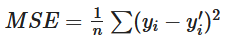

In [ ]:
# Investiga el uso de una de las siguiente función para calcular el error de forma automática
    # La función Dependerá de la versión de la librería que tienes instalada

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [ ]:
# Crea un dataframe a partir del conjunto de test (datos y objetivo), ordenado de menor a mayor según el coste


# Mete en un ndarray los valores del coste.


# A partir de este dataframe, haz una predicción usando el modelo.


# Con ambos ndarrays (valor real, valor predicho) haz un plot con 2 líneas, cada una de 1 color, para comparar diferencias.